# Input Data

In [ ]:
import pandas as pd
from google.colab import drive
import os

#memberikan akses kepada google colab
drive.mount('/content/drive')

dataset_path='/content/drive/My Drive/Tubes_PCD/Dataset_Tubes_PCD'

filepaths=[]
labels=[]
classlist=os.listdir(dataset_path)
for klass in classlist:
    classpath=os.path.join(dataset_path,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           filepaths  labels
0  /content/drive/My Drive/Tubes_PCD/Dataset_Tube...  Potato
1  /content/drive/My Drive/Tubes_PCD/Dataset_Tube...  Potato
2  /content/drive/My Drive/Tubes_PCD/Dataset_Tube...  Potato
3  /content/drive/My Drive/Tubes_PCD/Dataset_Tube...  Potato
4  /content/drive/My Drive/Tubes_PCD/Dataset_Tube...  Potato
labels
Potato      100
Carrot      100
Broccoli    100
Capsicum    100
Name: count, dtype: int64


# Labeling Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


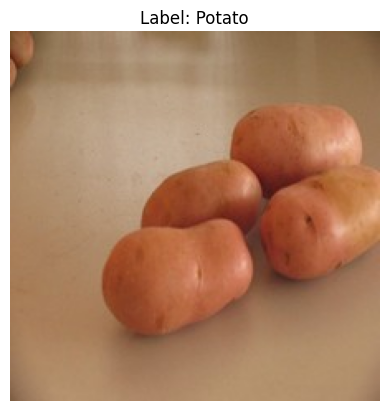

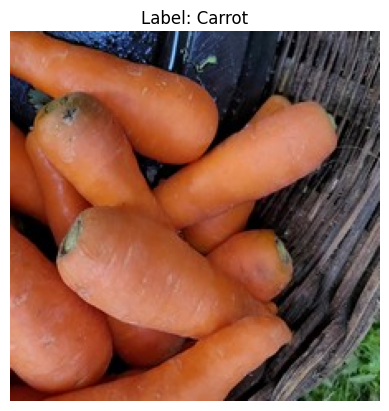

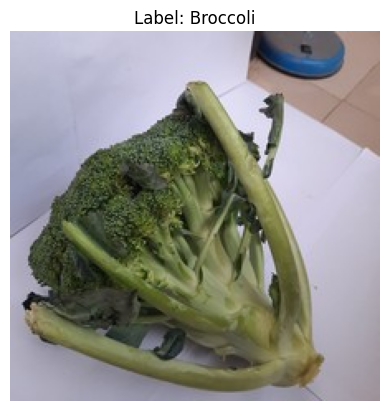

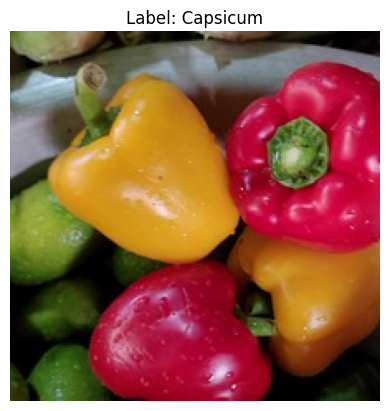

In [ ]:
# prompt: lakukan labeling berdasarkan label data ke seluruh data, dan tampilkan secara random gambar dari masing masing label. simpan kuga hasilnya ke folder bernama splitted_augment_data

import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import random
import shutil

#memberikan akses kepada google colab
drive.mount('/content/drive')

dataset_path='/content/drive/My Drive/Tubes_PCD/Dataset_Tubes_PCD'

# Create the output directory if it doesn't exist
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"
os.makedirs(output_dir, exist_ok=True)


# Display a random image from each label
for label in df['labels'].unique():
    label_df = df[df['labels'] == label]
    random_image_path = random.choice(label_df['filepaths'].tolist())

    try:
        img = plt.imread(random_image_path)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()

        # Create label subdirectory in output directory
        label_output_dir = os.path.join(output_dir, label)
        os.makedirs(label_output_dir, exist_ok=True)

        # Copy the images to the respective label folders
        for index, row in df[df['labels'] == label].iterrows():
            source_path = row['filepaths']
            filename = os.path.basename(source_path)
            destination_path = os.path.join(label_output_dir, filename)
            shutil.copy(source_path, destination_path)

    except Exception as e:
        print(f"Error processing image {random_image_path}: {e}")

# Resize Data menjadi 224x224

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


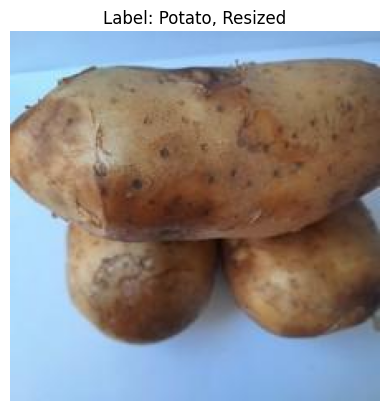

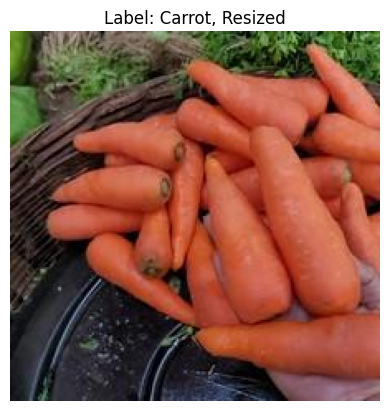

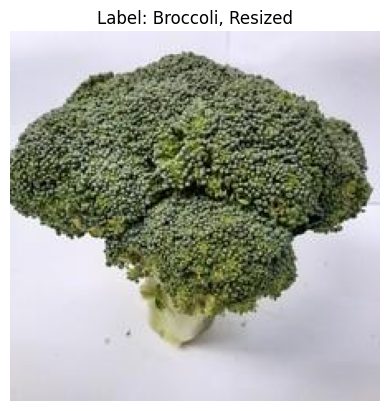

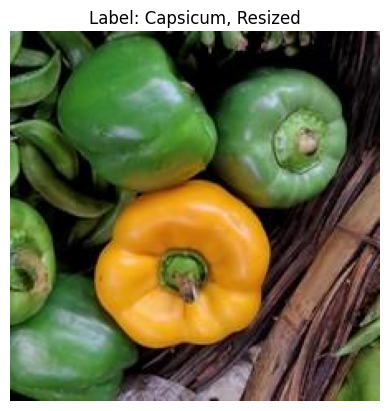

In [ ]:
# prompt: resize semua image menjadi 224x224, dan secara random tampilkan hasilnya, ambil datanya di splitted_augment_data, dan simpan juga hasilnya di splitted_augment_data

import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import random
import shutil
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
dataset_path = '/content/drive/My Drive/Tubes_PCD/splitted_augment_data'
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to resize images
def resize_image(image_path, size=(224, 224)):
    try:
        img = Image.open(image_path)
        img = img.resize(size)
        return img
    except Exception as e:
        print(f"Error resizing image {image_path}: {e}")
        return None

# Iterate through each label and resize images
for label in os.listdir(output_dir):
    label_dir = os.path.join(output_dir, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            resized_img = resize_image(image_path)

            if resized_img:
                resized_img.save(image_path) #Overwrite the original image with the resized one


# Display a random image from each label (after resizing)
for label in os.listdir(output_dir):
    label_dir = os.path.join(output_dir, label)
    if os.path.isdir(label_dir):
        image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]
        if image_files:
            random_image_path = os.path.join(label_dir, random.choice(image_files))
            try:
              img = plt.imread(random_image_path)
              plt.imshow(img)
              plt.title(f"Label: {label}, Resized")
              plt.axis('off')
              plt.show()
            except Exception as e:
              print(f"Error displaying image {random_image_path}: {e}")

# Normalisasi Pixel

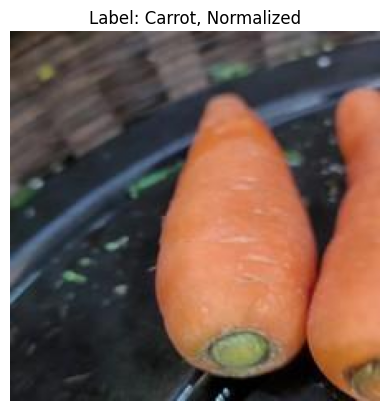

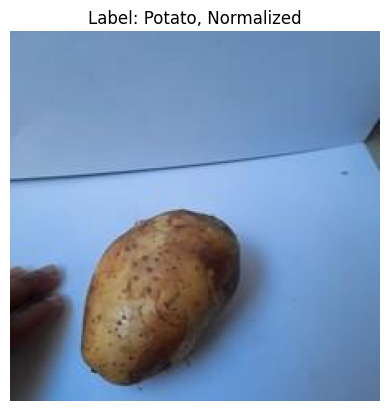

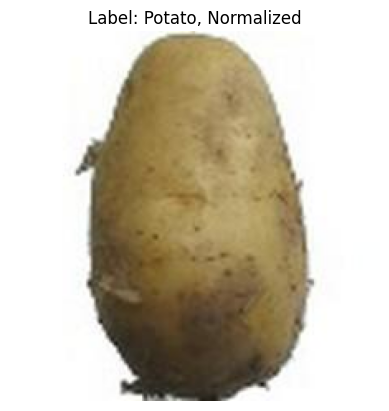

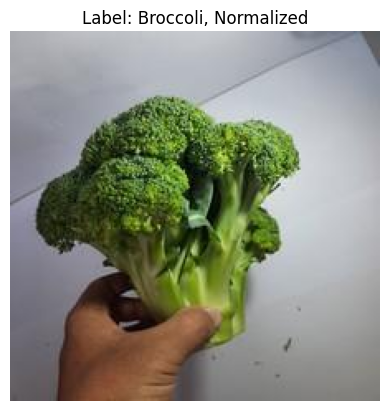

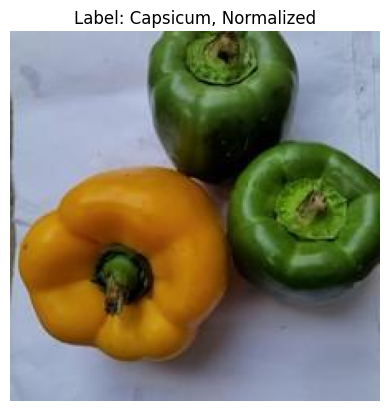

In [ ]:
# prompt: lakukan normalisasi pixel untuk semua data gambar, dan tampilkan outputnya secara random. ambil datanya di splitted_augment_data, dan simpan juga hasilnya di splitted_augment_data

import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define paths (assuming splitted_augment_data is already created and populated)
dataset_path = '/content/drive/My Drive/Tubes_PCD/splitted_augment_data'
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"

# Function to normalize pixel values
def normalize_image(image_path):
    try:
        img = Image.open(image_path)
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return Image.fromarray((img_array * 255).astype(np.uint8)) #Convert back to uint8
    except Exception as e:
        print(f"Error normalizing image {image_path}: {e}")
        return None

# Iterate through each label and normalize images
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            normalized_img = normalize_image(image_path)

            if normalized_img:
                normalized_img.save(image_path) #Overwrite with normalized image


# Display 5 random normalized images
for _ in range(5):
    label = random.choice(os.listdir(dataset_path))
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]
        if image_files:
            random_image_path = os.path.join(label_dir, random.choice(image_files))
            try:
                img = plt.imread(random_image_path)
                plt.imshow(img)
                plt.title(f"Label: {label}, Normalized")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error displaying image {random_image_path}: {e}")

# Augmentasi Data (Rotasi, Flipping, Shifting)

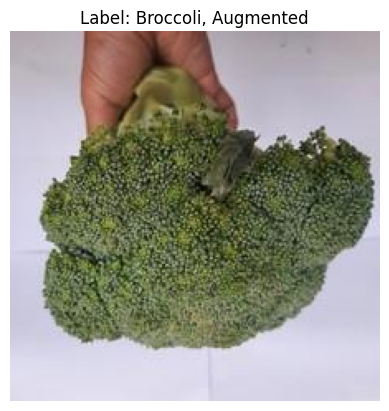

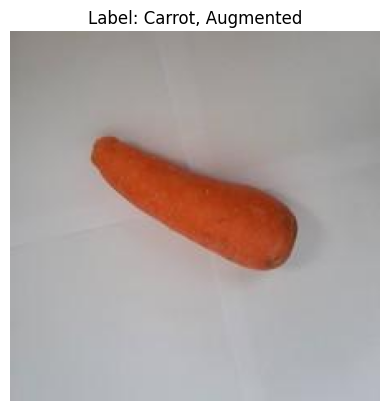

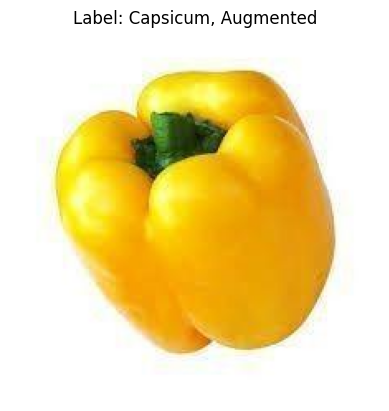

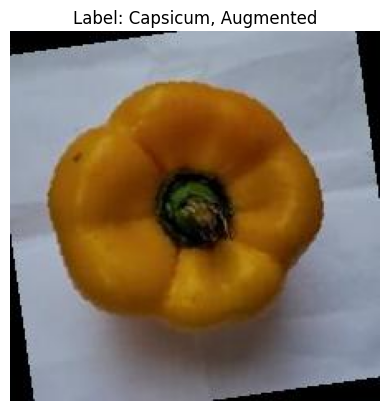

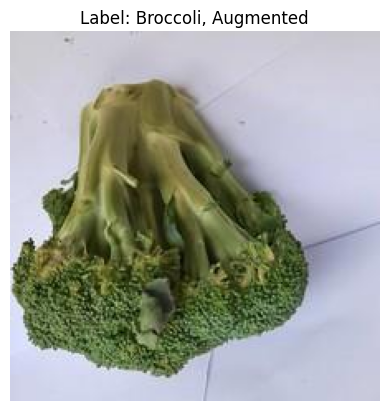

In [ ]:
# prompt: melakukan Augmentasi Data, Contoh Teknik: Rotasi, Flipping (horizontal/vertikal), shifting pada seluruh data.  tampilkan outputnya secara random.  ambil datanya di splitted_augment_data, dan simpan juga hasilnya di splitted_augment_data

import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define paths
dataset_path = '/content/drive/My Drive/Tubes_PCD/splitted_augment_data'
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"

# Function for image augmentation
def augment_image(image_path, output_path):
    try:
        img = Image.open(image_path)

        # Rotation
        angle = random.randint(-30, 30)
        rotated_img = img.rotate(angle)
        rotated_img.save(os.path.join(output_path, f"rotated_{os.path.basename(image_path)}"))

        # Horizontal Flipping
        flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
        flipped_img.save(os.path.join(output_path, f"flipped_h_{os.path.basename(image_path)}"))

        # Vertical Flipping
        flipped_v_img = img.transpose(Image.FLIP_TOP_BOTTOM)
        flipped_v_img.save(os.path.join(output_path, f"flipped_v_{os.path.basename(image_path)}"))

    except Exception as e:
        print(f"Error augmenting image {image_path}: {e}")


# Iterate through each label and augment images
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            augment_image(image_path, label_dir)  # Save augmented images in the same directory


# Display 5 random augmented images
for _ in range(5):
    label = random.choice(os.listdir(dataset_path))
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        augmented_image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f)) and (f.startswith('rotated_') or f.startswith('flipped_h_') or f.startswith('flipped_v_')) ]

        if augmented_image_files:
            random_image_path = os.path.join(label_dir, random.choice(augmented_image_files))
            try:
                img = plt.imread(random_image_path)
                plt.imshow(img)
                plt.title(f"Label: {label}, Augmented")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error displaying image {random_image_path}: {e}")

# Image Contrast Enhanching

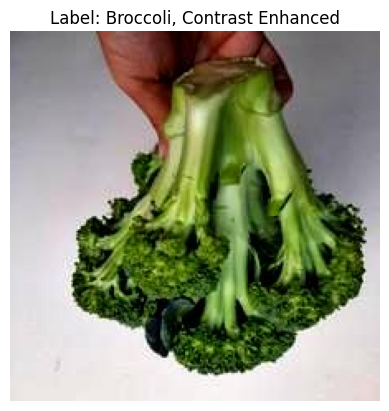

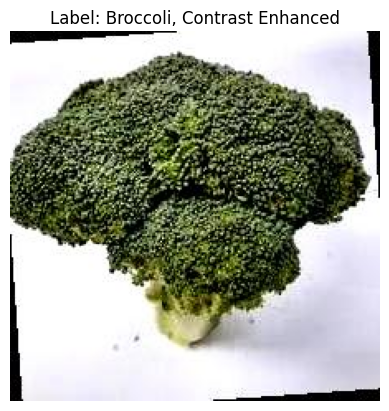

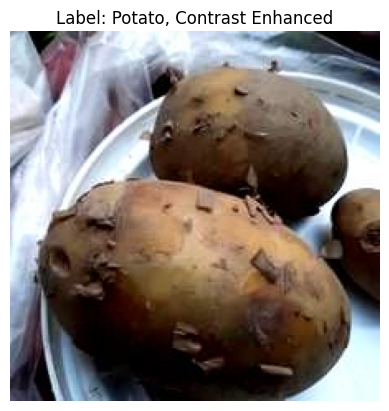

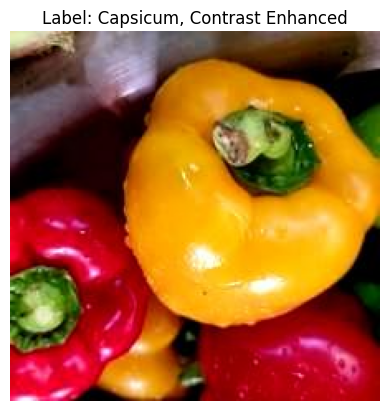

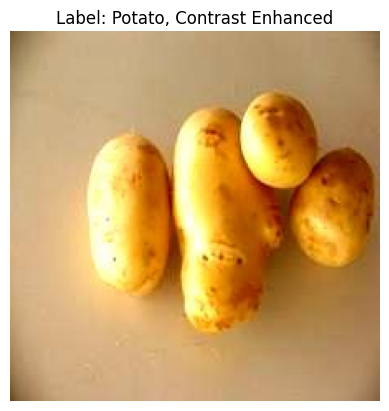

In [ ]:
# prompt: lakukan peningkatan kontras dan image enchancing pada seluruh data gambar, tampilkan outputnya secara random.  ambil datanya di splitted_augment_data, dan simpan juga hasilnya di splitted_augment_data

from PIL import ImageEnhance, Image
import matplotlib.pyplot as plt
import os
import random

# Define paths
dataset_path = '/content/drive/My Drive/Tubes_PCD/splitted_augment_data'
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"

# Function to enhance image contrast
def enhance_contrast(image_path, factor=1.5):
    try:
        img = Image.open(image_path)
        enhancer = ImageEnhance.Contrast(img)
        enhanced_img = enhancer.enhance(factor)
        return enhanced_img
    except Exception as e:
        print(f"Error enhancing contrast for {image_path}: {e}")
        return None

# Iterate through each label and enhance images
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            enhanced_image = enhance_contrast(image_path)
            if enhanced_image:
                enhanced_image.save(image_path) #Overwrite the original image

# Display 5 random enhanced images
for _ in range(5):
    label = random.choice(os.listdir(dataset_path))
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]
        if image_files:
            random_image_path = os.path.join(label_dir, random.choice(image_files))
            try:
                img = plt.imread(random_image_path)
                plt.imshow(img)
                plt.title(f"Label: {label}, Contrast Enhanced")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error displaying image {random_image_path}: {e}")

# Grayscaling

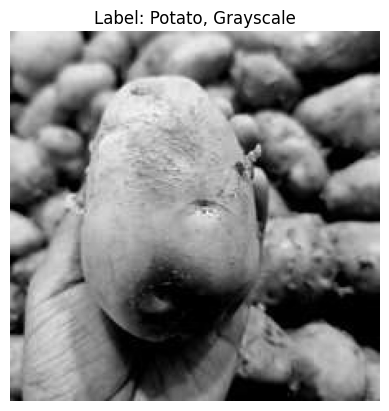

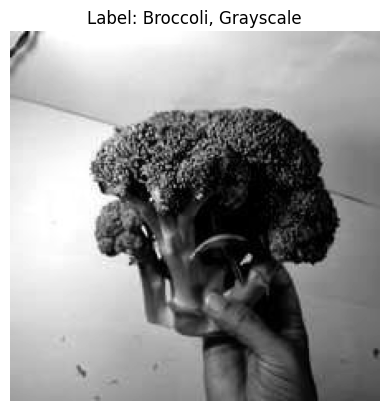

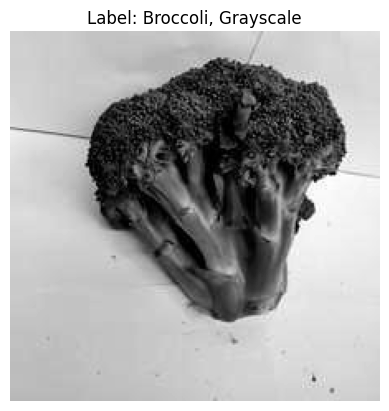

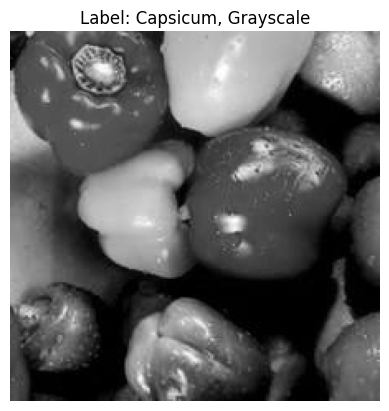

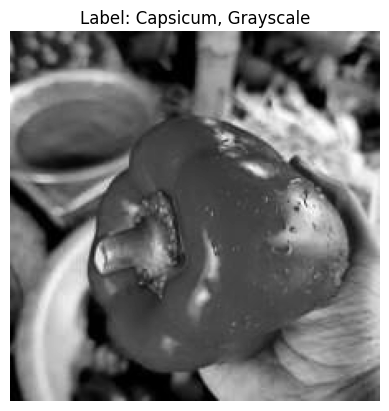

In [ ]:
# prompt: lakukan tahap grayscaling pada seluruh data. tampilkan outputnya secara random. ambil datanya di splitted_augment_data, dan simpan juga hasilnya di splitted_augment_data

# Define paths
dataset_path = '/content/drive/My Drive/Tubes_PCD/splitted_augment_data'
output_dir = "/content/drive/My Drive/Tubes_PCD/splitted_augment_data"

from PIL import Image

# Function to perform grayscale conversion
def convert_to_grayscale(image_path):
    try:
        img = Image.open(image_path).convert("L")
        return img
    except Exception as e:
        print(f"Error converting to grayscale: {image_path}: {e}")
        return None

# Iterate through each label and convert images to grayscale
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            grayscale_image = convert_to_grayscale(image_path)
            if grayscale_image:
                grayscale_image.save(image_path) #Save the grayscale image, overwriting the original

# Display 5 random grayscale images
for _ in range(5):
    label = random.choice(os.listdir(dataset_path))
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]
        if image_files:
            random_image_path = os.path.join(label_dir, random.choice(image_files))
            try:
                img = plt.imread(random_image_path)
                plt.imshow(img, cmap='gray') #Important: Use 'gray' colormap
                plt.title(f"Label: {label}, Grayscale")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error displaying image {random_image_path}: {e}")